In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
!pwd

/content


In [3]:
df_analyst = pd.read_csv("./master/data_analyst.csv")
df_software = pd.read_csv("./master/software_engineering.csv")
df_scientist = pd.read_csv("./master/data_scientist.csv")
df_data = pd.read_csv("./master/data_engineer.csv")

FileNotFoundError: [Errno 2] No such file or directory: './master/data_analyst.csv'

In [ ]:
# Merge all the DataFrames into a single DataFrame
merged_dataframe = pd.concat([df_analyst, df_software, df_scientist, df_data], ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_dataframe.to_csv("./merged_jobs.csv", index=False)

In [32]:
df_master = pd.read_csv("./master/merged_jobs.csv")

In [33]:
df_master.shape

(32641, 11)

In [34]:
df_master.head()

,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills
0,"Data Analyst-SQL, Tableau",Zortech Solutions,"Mountain View, CA",https://www.linkedin.com/jobs/data-analyst-jobs,2023-12-20,Bloomington,United States,Associate,Onsite,NaN,NaN
1,Market Research & Insights Analyst,Indiana University Foundation,"Bloomington, IN",https://www.linkedin.com/jobs/view/market-rese...,2023-12-20,Bloomington,United States,Mid senior,Onsite,Company Description\nAre you a high-performer ...,"Data analysis, Market research, Survey develop..."
2,Business Systems Analyst `1,Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/business-sy...,2023-12-20,Bloomington,United States,Mid senior,Onsite,Overview\nThe Business Systems Analyst 1 perfo...,"Business Analysis, Technical Writing, Software..."
3,Senior VAT and Indirect Tax Analyst,Epic,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-vat-...,2023-12-20,Bloomington,United States,Mid senior,Onsite,We're looking for an experienced tax professio...,"Accounting, Finance, VAT/GST tax regimes, US a..."
4,Senior HRIS Analyst (Timekeeping and Payroll),Nordson Corporation,Greater Bloomington Area,https://www.linkedin.com/jobs/view/senior-hris...,2023-12-20,Bloomington,United States,Mid senior,Remote,Collaboration drives Nordson’s success as a ma...,"Workday HCM, UKG Dimensions, Ceridian Dayforce..."


In [35]:
df_master.describe()

,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills
count,32641,32641,32641,32641,32641,32641,32641,32641,32641,32230,31368
unique,13465,9150,3259,29331,3,960,7,2,3,24147,31244
top,Senior Software Engineer,Jobs for Humanity,United States,https://ca.linkedin.com/jobs/view/customer-ser...,2023-12-20,Greater London,United States,Mid senior,Onsite,Who is Recruiting from Scratch :\nRecruiting f...,"Databricks, SQL, Python, PySpark, Azure Data F..."
freq,794,805,598,3,17236,341,25283,26244,15707,136,7


In [36]:
df_master.isna().sum()

job_title            0
company              0
job_location         0
job_link             0
first_seen           0
search_city          0
search_country       0
job level            0
job_type             0
job_summary        411
job_skills        1273
dtype: int64

In [37]:
df_master.dropna(inplace=True)

In [38]:
df_master.isna().sum()

job_title         0
company           0
job_location      0
job_link          0
first_seen        0
search_city       0
search_country    0
job level         0
job_type          0
job_summary       0
job_skills        0
dtype: int64

In [39]:
df_master.shape

(31368, 11)

In [40]:
df_master["search_country"].value_counts()

United States      24434
United Kingdom      2732
Canada              1779
Australia            810
 Canada              767
 United Kingdom      617
 Australia           229
Name: search_country, dtype: int64

In [41]:
df_master['search_country'] = df_master['search_country'].str.strip()

In [42]:
df_master["search_country"].value_counts()

United States     24434
United Kingdom     3349
Canada             2546
Australia          1039
Name: search_country, dtype: int64

In [43]:
df_master["job_title"].value_counts()

Senior Software Engineer                                      793
Software Engineer                                             587
Data Analyst                                                  572
Senior Data Engineer                                          531
Data Engineer                                                 472
                                                             ... 
Senior Business Systems Analyst, Finance Systems                1
Senior FMV Analyst                                              1
BCBA - Board Certified Behavior Analyst                         1
Treasury Analyst Senior                                         1
Installation Supervisor Data Cables / International Travel      1
Name: job_title, Length: 13155, dtype: int64

**Start doing data cleaning and wrandling on this Master data.**
1. Make sure all the text values are cleaned.
2. There may be some **emoticons** present in the description make sure to handle those.
3. **Make sure that data is ready for downstream tasks.** As I will be building on top of that

In [ ]:
unique_list = []

for col in df_master.columns:
    item = (col, df_master[col].nunique(), df_master[col].dtypes, df_master[col].unique())
    unique_list.append(item)

unique_counts = pd.DataFrame(
    unique_list,
    columns=["Column", "Number_of_unique_values", "Type", "Unique_category"]
).sort_values(by="Number_of_unique_values")


display(unique_counts)

In [45]:
df_master.drop('first_seen', axis=1, inplace=True)


In [87]:
df_copy = df_master.copy()

In [86]:
df_master = df_copy

In [ ]:
from geotext import GeoText

def extract_city_with_geotext(location):
    places = GeoText(location)
    cities = list(places.cities)
    return cities[0] if cities else 'Unknown'

df_master['city'] = df_master['job_location'].apply(extract_city_with_geotext)

In [90]:
df_master.head()

,job_title,company,job_location,job_link,search_city,search_country,job level,job_type,job_summary,job_skills,city
1,Market Research & Insights Analyst,Indiana University Foundation,"Bloomington, IN",https://www.linkedin.com/jobs/view/market-rese...,Bloomington,United States,Mid senior,Onsite,Company Description\nAre you a high-performer ...,"Data analysis, Market research, Survey develop...",Bloomington
2,Business Systems Analyst `1,Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/business-sy...,Bloomington,United States,Mid senior,Onsite,Overview\nThe Business Systems Analyst 1 perfo...,"Business Analysis, Technical Writing, Software...",Bloomington
3,Senior VAT and Indirect Tax Analyst,Epic,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-vat-...,Bloomington,United States,Mid senior,Onsite,We're looking for an experienced tax professio...,"Accounting, Finance, VAT/GST tax regimes, US a...",Bloomington
4,Senior HRIS Analyst (Timekeeping and Payroll),Nordson Corporation,Greater Bloomington Area,https://www.linkedin.com/jobs/view/senior-hris...,Bloomington,United States,Mid senior,Remote,Collaboration drives Nordson’s success as a ma...,"Workday HCM, UKG Dimensions, Ceridian Dayforce...",Unknown
5,Business Intelligence Reporting Analyst 2,Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/business-in...,Bloomington,United States,Mid senior,Hybrid,Overview\nThe Business Intelligence Analyst 2 ...,"SAP Business Objects, SQL, Qlik, Data Modeling...",Bloomington


In [91]:
unknown_city_rows = df_master[df_master['city'] == 'Unknown']
unknown_city_rows.count()

job_title         5847
company           5847
job_location      5847
job_link          5847
search_city       5847
search_country    5847
job level         5847
job_type          5847
job_summary       5847
job_skills        5847
city              5847
dtype: int64

In [92]:
known_countries = ['United States', 'Australia', 'Canada']
known_regions = ['England', 'Scotland', 'Wales', 'Northern Ireland']

known_states_us = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

def refine_city_extraction(row):

    if row['city'] == 'Unknown':
        location = row['job_location']
        parts = [part.strip() for part in location.split(',')]
        if len(parts) == 2 and parts[1] in known_states_us:
            return parts[0]
        elif len(parts) == 3:
            return parts[0]

    return row['city']

df_master['city'] = df_master.apply(refine_city_extraction, axis=1)

print(df_master[['job_location', 'city']])

                                    job_location              city
1                                Bloomington, IN       Bloomington
2                                Bloomington, IN       Bloomington
3                                Bloomington, IN       Bloomington
4                       Greater Bloomington Area           Unknown
5                                Bloomington, IN       Bloomington
...                                          ...               ...
32635  Northamptonshire, England, United Kingdom  Northamptonshire
32636          Brackley, England, United Kingdom          Brackley
32637       Northampton, England, United Kingdom       Northampton
32638     Milton Keynes, England, United Kingdom     Milton Keynes
32639            Manchester Area, United Kingdom           Unknown

[31368 rows x 2 columns]


In [101]:
unknown_city_count = df_master[df_master['city'] == 'Unknown']["job_location"].count()
print(f"Number of rows with 'Unknown' city: {unknown_city_count}")


df_master = df_master[df_master['city'] != 'Unknown']
df_master.reset_index(drop=True, inplace=True)

df_master.head()

Number of rows with 'Unknown' city: 2217


,job_title,company,job_location,job_link,search_city,search_country,job level,job_type,job_summary,job_skills,city
0,Market Research & Insights Analyst,Indiana University Foundation,"Bloomington, IN",https://www.linkedin.com/jobs/view/market-rese...,Bloomington,United States,Mid senior,Onsite,Company Description\nAre you a high-performer ...,"Data analysis, Market research, Survey develop...",Bloomington
1,Business Systems Analyst `1,Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/business-sy...,Bloomington,United States,Mid senior,Onsite,Overview\nThe Business Systems Analyst 1 perfo...,"Business Analysis, Technical Writing, Software...",Bloomington
2,Senior VAT and Indirect Tax Analyst,Epic,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-vat-...,Bloomington,United States,Mid senior,Onsite,We're looking for an experienced tax professio...,"Accounting, Finance, VAT/GST tax regimes, US a...",Bloomington
3,Business Intelligence Reporting Analyst 2,Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/business-in...,Bloomington,United States,Mid senior,Hybrid,Overview\nThe Business Intelligence Analyst 2 ...,"SAP Business Objects, SQL, Qlik, Data Modeling...",Bloomington
4,Lead Senior Business Analyst,Nashville Toyota North,"Laughlin AFB, TX",https://www.linkedin.com/jobs/view/lead-senior...,Del Rio,United States,Mid senior,Hybrid,"R2C, Inc. is a rapidly growing, SDVOSB headqua...","Information technology, Microsoft Office, Data...",Laughlin AFB


In [106]:
df_master["city"].nunique()

2569

In [136]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
from time import sleep

In [125]:
l = geolocator.geocode("Monrovia, CA")

In [137]:
len(geocode_cache)

1701

In [134]:
geolocator = Nominatim(user_agent="sauravjoshi_33@rediffmail.com")

# Cache for storing city geocodes to avoid repeated requests
geocode_cache = {}

In [138]:

def get_lat_lon(city):
    if city in geocode_cache:
        return geocode_cache[city]
    else:
        max_retries = 5
        retries = 0
        while retries < max_retries:
            try:
                location = geolocator.geocode(city)
                if location:
                    geocode_cache[city] = (location.latitude, location.longitude)
                    print(f"Found: {geocode_cache[city]}")
                    return geocode_cache[city]
                else:
                    print(f"Not found: {city}")
                    geocode_cache[city] = (None, None)
                    return (None, None)
            except (GeocoderTimedOut, GeocoderUnavailable):
                retries += 1
                sleep_time = 5
                print(f"Timeout or unavailable, retrying... ({retries}/{max_retries})")
                sleep(sleep_time)
        return (None, None)

def process_batch(cities):
    return cities.apply(get_lat_lon)

# Batch processing
batch_size = 1000
for start in range(0, len(df_master), batch_size):
    end = start + batch_size
    df_master.loc[start:end, 'latitude_longitude'] = process_batch(df_master['job_location'][start:end])
    print(f"Processed batch {start//batch_size + 1}/{(len(df_master) - 1)//batch_size + 1}")
    sleep(1)

print(df_master.head())


Processed batch 1/30
Processed batch 2/30
Processed batch 3/30
Processed batch 4/30
Processed batch 5/30
Processed batch 6/30
Processed batch 7/30
Processed batch 8/30


Found: (38.9742502, -94.6851702)
Found: (37.4108841, -94.70496)
Found: (38.6338982, -95.8258206)
Found: (40.3099385, -74.51772241230152)
Found: (50.9999616, -0.1049747)
Found: (26.5909025, -80.1008762)
Found: (40.6178915, -75.3786521)
Found: (39.8964641, -80.1792299)
Found: (40.9664806, -76.6131474)
Found: (50.2668671, -119.2718157)
Found: (53.749326, -2.4840566)
Found: (53.8611703, -2.5650887919475496)
Found: (53.824548300000004, -3.037319995021968)
Found: (53.76184215, -2.602585671012924)
Found: (53.7593363, -2.6992717)
Found: (34.5972449, -83.7633058)
Found: (35.2702448, -106.6329806)
Found: (36.7291152, -108.205445)
Found: (32.4388224, -103.159002)
Found: (34.0572858, -106.8930799)
Found: (36.7042198, -105.5949)
Found: (43.207178, -71.537476)
Found: (43.12354, -71.011505)
Found: (44.18505465, -72.45609847473165)
Found: (44.337125349999994, -72.75549720909403)
Found: (38.8040027, -76.9066396)
Found: (52.3994233, -0.728004)
Found: (52.666667, -1.0)
Found: (52.8013972, -1.4001818)
Fou

Found: (49.1039289, -122.657047)
Found: (49.3206294, -123.0737925)
Found: (41.5192189, -81.457896)
Found: (41.478387, -81.46373)
Found: (41.541872, -81.439452)
Found: (51.7345329, 0.4730532)
Found: (42.437417499999995, -76.54837235139263)
Found: (30.1734194, -95.504686)
Found: (40.875891, -81.4023356)
Found: (41.240056, -81.440667)
Found: (41.3136644, -81.7245739)
Found: (40.7985464, -81.3749508)
Found: (51.0805315, -1.8607051)
Found: (54.6072779, -1.2910885)
Found: (54.6857276, -1.2093696)
Found: (54.5242081, -1.5555812)
Found: (54.5760419, -1.2344047)
Found: (51.5074456, -0.1277653)
Found: (51.5156177, -0.0919983)
Found: (51.5423045, -0.1395604)
Found: (46.2306739, -119.0921)
Found: (46.2804298, -119.275205)
Found: (51.7511784, -0.472528)
Found: (45.0838098, -93.0069304)
Found: (37.72067005, -121.42778512032798)
Found: (37.6390972, -120.996878)
Found: (53.6466645, -1.7822482)
Found: (53.9257254, -1.824441)
Found: (49.2067726, -122.9108818)
Found: (49.1913033, -122.849143)
Found: (49.

Found: (40.6938609, -89.5891008)
Found: (40.8616513, -89.6777665)
Found: (34.4458248, -119.0779359)
Found: (34.2176371, -119.0383541)
Found: (34.1477558, -119.1951559)
Found: (34.4458248, -119.0779359)
Found: (34.1976308, -119.180381)
Found: (-33.8863291, 151.1998211)
Found: (-33.8933952, 151.1368729)
Found: (43.7848982, -79.5923855)
Found: (-27.449662500000002, 153.0237294176169)
Found: (-27.4689682, 153.0234991)
Found: (38.3031837, -77.4605399)
Found: (37.88387115, -75.45616657057555)
Found: (41.1365122, -95.8937398)
Found: (41.5444379, -96.1250151)
Not found: Albany, New York Metropolitan Area
Found: (39.3642852, -74.4229351)
Found: (-37.8333613, 144.9219203)
Found: (-37.8253618, 144.9640203)
Found: (52.4796992, -1.9026911)
Found: (52.688227, -2.0324197)
Found: (52.5847651, -2.127567)
Found: (45.3246068, -118.0878695)
Found: (41.4734268, -74.5384933)
Found: (41.7142564, -74.726273)
Found: (41.8012002, -74.7465527)
Found: (33.35029299999999, -86.85112299766301)
Found: (41.7123218, -7

Found: (39.2138905, -79.6371124)
Found: (39.5437259, -78.8107845)
Found: (37.8024603, -81.9284776)
Found: (38.8188287, -81.7105572)
Found: (46.0131505, -112.536508)
Found: (33.4504157, -82.1981764)
Found: (33.9701009, -84.2215869)
Found: (53.7974185, -1.5437941)
Found: (54.0099825, -1.462186)
Found: (53.9590555, -1.0815361)
Found: (37.1118778, -76.895924)
Found: (37.2708788, -76.7074042)
Found: (37.6081987, -76.7785721)
Not found: The Home, England, United Kingdom
Found: (52.439652, -2.8356405)
Found: (52.6780419, -2.4514273)
Found: (52.707755, -2.7540658)
Found: (52.9045385, -2.491841)
Found: (26.715364, -80.0532942)
Found: (26.784343, -80.0650293)
Found: (26.6279798, -80.4494174)
Found: (40.8853773, -73.9523597)
Found: (40.8272785, -83.2813089)
Found: (43.7729744, -79.2576479)
Found: (52.5050033, -1.964396123331272)
Found: (52.339638, -2.2811646)
Found: (52.5110832, -2.0816813)
Found: (51.5613683, -1.7856853)
Found: (52.3057655, -1.9417444)
Not found: Black Country, England, United K

Found: (39.0672568, -108.56448)
Found: (38.7251776, -105.607716)
Found: (51.5882332, -2.9974967)
Found: (40.1842455, -75.13905239078957)
Found: (40.2688105, -74.8006895)
Found: (39.934002, -74.8909988)
Found: (40.3281213, -74.7909992)
Found: (40.382304500000004, -74.5170514187837)
Found: (53.3058355, -2.2375778)
Found: (53.3025402, -2.3716001)
Found: (53.2606635, -2.1255158)
Found: (53.0996153, -2.4414627)
Found: (53.0162014, -2.1812607)
Found: (53.29348, -2.1107855)
Found: (52.9356992, -1.6764276)
Found: (52.9884392, -1.9937596)
Found: (53.350342049999995, -2.280369252664295)
Found: (52.8063157, -2.1163818)
Found: (53.1920711, -2.5313108)
Found: (42.9825634, -77.4088794)
Found: (43.090959, -77.515298)
Found: (35.7902384, -80.2115053)
Found: (35.4094178, -80.5800049)
Found: (35.9412851, -80.4096455)
Found: (35.6709727, -80.4742261)
Found: (41.1253903, -87.848682)
Found: (41.8505866, -87.8820048)
Found: (39.7990175, -89.6439575)
Not found: Springfield, Illinois Metropolitan Area
Found: 

Found: (34.5023029, -97.9578129)
Found: (36.3084275, -95.3169136)
Found: (51.2954028, 0.409461)
Found: (51.6201654, 0.3018662)
Found: (51.5754602, 0.4757363)
Found: (51.20707485, 0.7210361813401444)
Found: (51.2750756, 0.5600642580769895)
Found: (51.5760462, 0.1822646)
Found: (51.3397366, 0.7342319)
Found: (51.4424747, 0.3694468)
Found: (51.507818, -0.5409049)
Found: (51.2738332, 0.40601418411403867)
Found: (51.27452185, 0.1961165562194977)
Found: (51.4906957, 0.1112776)
Found: (51.8019608, 0.6383746)
Found: (51.3819167, 0.526559)
Not found: East London Tech City, England, United Kingdom
Found: (-34.0354477, 151.1248018)
Found: (33.6617962, -95.555513)
Found: (40.1117174, -88.207301)
Found: (40.1164841, -88.2430932)
Found: (33.5723191, -81.6182086)
Found: (40.4797828, -88.9939147)
Found: (40.5092961, -88.9843937)
Found: (29.9427892, -89.9629372)
Found: (42.1051571, -77.2340584)
Found: (42.1620186, -77.0941366)
Found: (37.0841838, -94.5133385)
Found: (43.643032, -72.251587)
Found: (42.7

Not found: New York City Municipal Archives, NY
Found: (39.2501246, -119.951909)
Found: (42.5389512, -71.6094356)
Found: (41.9438129, -71.2806515)
Found: (33.9934867, -81.0739826)
Found: (37.9060368, -122.5449763)
Found: (37.9254806, -122.527475)
Found: (28.6702526, -81.2084941)
Found: (36.3467726, -115.090737)
Found: (40.9328397, -80.3633981)
Found: (39.0306626, -82.8247137)
Found: (35.2301869, -97.3109151)
Found: (33.8915985, -118.3951241)
Found: (34.285558, -118.8820414)
Found: (33.9776848, -118.448647)
Found: (34.7550166, -92.3003472)
Found: (34.856613, -92.4056858)
Not found: St. Louis City County, MO
Found: (6.8302563, -10.5100261)
Found: (37.1806049, -93.0360117)
Found: (42.3472406, -89.0389956)
Found: (40.7944504, -77.8616386)
Found: (47.52326, -92.536571)
Found: (44.6471761, -100.348761)
Found: (43.70953, -98.025379)
Found: (34.1065404, -117.8069361)
Found: (34.0553813, -117.7517496)
Found: (39.0984317, -76.8485094)
Found: (39.8101134, -75.2112925)
Found: (43.106456, -76.21770

Found: (50.9542525, -0.1546382)
Found: (54.13453275, -1.498628491239545)
Found: (53.7965525, -1.2499345)
Found: (42.0980812, -88.2828581)
Found: (42.0978028, -88.5303643)
Found: (41.5514283, -71.4693875)
Found: (40.6652251, -74.3045277)
Found: (33.1162131, -94.1663493)
Found: (33.4598415, -94.4154787)
Found: (51.5174861, -0.0659685)
Found: (51.77046785, 0.46466977412300386)
Found: (51.500467, -0.03573064135865517)
Found: (51.518043, -0.0817735)
Found: (47.6571934, -117.42351)
Found: (42.194543, -71.1994976)
Found: (38.7761446, -90.3715909)
Found: (38.7850251, -90.7935034)
Found: (38.7566055, -90.42352)
Found: (38.3636553, -90.4655446)
Found: (40.5861322, -98.3898883)
Found: (31.2012636, -97.70842502110759)
Found: (50.8557256, 0.5480144)
Found: (51.0590028, 0.1635863)
Found: (50.8553888, 0.5824703)
Found: (53.3421509, -2.7334941)
Found: (53.35385255, -2.7427828785393507)
Found: (51.7135573, -0.4503027)
Found: (51.3392845, -0.7460981)
Found: (51.6721095, -0.9679187)
Found: (51.60977935, 

Found: (43.9734756, -79.47839000744614)
Found: (54.8508458, -5.8183116)
Found: (54.662595, -5.6679127)
Found: (54.715139, -6.2192038)
Found: (43.7533414, -88.4493796)
Found: (42.7091389, -73.5107732)
Found: (42.8642267, -78.2802946)
Found: (42.7670376, -78.7435517)
Found: (52.2150202, -1.8695764)
Found: (52.2913394, -1.536404)
Found: (51.7413948, -1.0611519)
Found: (52.183882249999996, -1.4665136858172174)
Found: (52.448466499999995, -1.7487734687889553)
Found: (42.5195292, -70.8967226)
Found: (43.4925843, -70.4533844)
Found: (30.418895499999998, -89.43471299999999)
Found: (34.6981064, -118.1366153)
Found: (26.271192, -80.2706044)
Found: (25.98584285, -80.14118350866113)
Found: (41.3661614, -81.8543026)
Found: (52.4492074, -2.0514646)
Found: (52.7589402, -1.9362042)
Found: (36.2452294, -101.8858689)
Found: (38.0049214, -121.805789)
Found: (36.0600602, -86.6722192)
Found: (35.7331953, -80.6770111)
Found: (36.264818500000004, -80.84776715501519)
Found: (38.8837933, -94.8389141)
Found: (3

Found: (43.0045289, -71.348398)
Found: (42.9464737, -71.5159015)
Found: (32.6400541, -117.084195)
Found: (44.199436, -75.60688)
Found: (51.4568044, -0.1167959)
Found: (39.7686055, -94.8466322)
Found: (28.5825505, -81.46183230278461)
Found: (28.3876261, -81.57491966925264)
Found: (38.3428208, -81.5089835)
Found: (39.4717557, -79.6833884)
Not found: Fayetteville, North Carolina Metropolitan Area
Found: (34.7743383, -96.6783651)
Not found: Portland, Maine Metropolitan Area
Found: (43.1769367, -90.0680478)
Found: (45.773279, -111.184535)
Found: (40.0507198, -77.5205485)
Found: (35.3107214, -120.832348)
Found: (41.7616204, -88.4439261)
Found: (46.2087066, -119.119919)
Found: (41.7693747, -111.804665)
Found: (52.75969175, -1.302809436102533)
Found: (52.7471344, -1.4712148)
Found: (52.6345819, -1.6948438)
Found: (52.6362, -1.1331969)
Found: (52.824694199999996, -2.0074546723348115)
Found: (40.1226101, -75.0635049)
Found: (40.7250986, -73.2453946)
Found: (37.8314089, -122.2865266)
Found: (46.3

Found: (42.4840418, -76.4779117)
Found: (33.8322043, -118.2517547)
Found: (34.0923014, -118.3692894)
Found: (42.8694731, -85.6447492)
Found: (40.7695457, -74.0204177)
Found: (27.9184543, -82.3488057)
Found: (28.1470965, -82.756367)
Found: (41.5498576, -112.110716)
Found: (45.4453082, -73.7510888)
Found: (-37.8193813, 145.1221034)
Found: (47.4627356, -122.2559156)
Found: (52.666667, 1.0)
Found: (50.8809034, -0.5415345)
Found: (41.1792695, -73.1887863)
Found: (41.2706527, -72.9470471)
Found: (41.2795414, -72.8150989)
Found: (43.0375748, -73.9292912)
Found: (20.763395, -156.44639965521395)
Not found: Meyer Camp, HI
Found: (22.0708124, 69.3095172)
Found: (42.1034528, -76.2622669)
Found: (42.2628769, -74.0878112)
Found: (42.098408, -76.0493684)
Found: (38.8611619, -86.4872149)
Found: (39.4922608, -76.6589528)
Found: (39.1354665, -76.70062377708201)
Found: (38.838491000000005, -77.20852375508332)
Found: (38.965365000000006, -76.84179265424164)
Found: (44.0839937, -93.2261076)
Found: (33.2021

Found: (49.1862723, -122.97769214844749)
Found: (38.959396999999996, -76.1972184486028)
Found: (42.0653768, -71.2478308)
Found: (48.5428314, -53.4843703188868)
Found: (40.7980976, -81.9397733)
Found: (41.012833, -81.6051221)
Found: (39.6042757, -76.1705087)
Found: (39.6065073, -75.8330934)
Found: (32.7620405, -96.7790069)
Found: (40.5697893, -79.7647705)
Found: (40.5695119, -79.8636624)
Found: (38.9529442, -76.9408647)
Found: (40.4191229, -86.8919011)
Found: (41.2283821, -85.1724741)
Found: (42.6791433, -89.6076428)
Found: (42.7600188, -87.9134133)
Found: (43.0622536, -88.3123889)
Found: (41.5152157, -90.4420411)
Found: (41.5122561, -90.4151301)
Found: (41.5857364, -90.7744597)
Found: (52.1258094, -2.3195676)
Found: (41.9442357, -87.6541725)
Found: (28.016001, -81.89767)
Found: (40.803529, -73.124548)
Found: (41.6764876, -71.915073)
Found: (35.438698, -93.9446447)
Found: (35.718344, -91.55326)
Found: (43.4652699, -80.5222961)
Found: (41.6012796, -85.8590603)
Found: (38.2912431, -76.635

Found: (50.84467705, -0.7831144316193243)
Found: (50.7827109, -1.536465)
Found: (42.8154056, -73.8928774)
Found: (42.2410562, -83.613055)
Found: (41.0602024, -76.2461259)
Processed batch 20/30
Found: (45.8585406, 9.1528818)
Found: (39.8028415, -82.8062848)
Found: (39.9139207, -83.1633336)
Found: (39.7683959, -83.0571297)
Found: (39.8428215, -82.805646)
Found: (39.8789527, -82.9507363)
Found: (38.2786312, -77.175356)
Found: (52.4552224, -1.1997815)
Found: (51.6467058, 0.0544098)
Found: (38.8156356, -77.2836849)
Not found: Washington Highlands, MD
Found: (40.385549, -105.04436132094955)
Found: (44.1019126, -77.57539)
Found: (33.4859402, -86.9119366)
Found: (34.8045487, -86.9711698)
Found: (39.04064995, -77.12338890613549)
Found: (53.7319746, -1.6602524)
Found: (41.4193829, -87.3692227)
Found: (38.2856247, -85.8241312)
Found: (38.1787175, -85.664528)
Found: (54.0484068, -2.7990345)
Found: (-34.6685168, -58.5070582)
Found: (52.6492275, -1.934694)
Found: (53.1673422, -2.2928802778613573)
Fo

Found: (37.776547, -122.39483705092607)
Found: (40.131174400000006, -75.42279892329418)
Found: (37.496904, -122.3330573)
Found: (41.4529215, -72.4613902)
Found: (39.3501959, -76.8993808)
Found: (39.7342825, -74.9182198)
Found: (30.4312921, -86.69022912473963)
Processed batch 22/30
Found: (34.1008426, -117.7678355)
Found: (42.0283379, -97.4169964)
Found: (41.1238873, -100.7654232)
Found: (41.4801166, -71.5227103)
Found: (42.33027, -83.04755565941468)
Found: (52.0601807, -1.3402795)
Found: (40.6834349, -74.442653)
Found: (40.2932319, -74.1671114)
Found: (52.586288, -1.1059076)
Found: (51.647994, -0.6327506)
Found: (40.4653962, -80.6009547)
Found: (42.2781401, -74.9159946)
Found: (42.5906322, -74.9451573)
Found: (-37.7871148, 144.9515533)
Found: (41.1494512, -8.6107884)
Found: (38.7077507, -9.1365919)
Found: (30.7334421, 76.7797143)
Found: (-6.26289085, 106.88222894692834)
Found: (40.4167047, -3.7035825)
Found: (-38.0279936, 145.2209236)
Found: (41.7064789, -81.2380032)
Found: (41.4853003

Found: (30.6204939, -86.1912678)
Found: (42.3875968, -71.0994968)
Found: (35.01096025, -118.19028326663798)
Found: (41.6397857, -87.4548466)
Found: (41.6797598, -87.4944645)
Found: (41.5662245, -87.5381569)
Found: (41.616016, -87.5295837)
Found: (41.6008681, -87.6069894)
Found: (41.6389236, -87.607268)
Found: (41.5062834, -87.6357079)
Found: (41.7345874, -87.5513222)
Found: (41.6333678, -87.6331021)
Found: (41.5428123, -87.6847684)
Found: (41.6274511, -93.7380243)
Found: (44.2726203, -121.173921)
Found: (44.4104025, -122.6723065)
Found: (27.4930466, -99.5074055)
Found: (52.8921132, -1.1502372)
Found: (40.8164458, -74.2210643)
Found: (52.8411689, -1.3409476)
Found: (46.534658, -88.110135)
Found: (52.0154955, -0.9053801)
Found: (36.1012145, -95.9250506)
Found: (36.7421089, -95.9528877)
Found: (51.4443059, 0.21807)
Found: (42.5763523, -71.9952737)
Found: (41.0336485, -90.0984504)
Found: (51.596827149999996, -0.3373046180437286)
Found: (51.5718706, -0.7769654)
Found: (29.9443902, -95.99558

In [139]:
none_count = df_master['latitude_longitude'].apply(lambda x: x == (None, None)).sum()
print(f"Number of (None, None) entries: {none_count}")
print(df_master.shape)

Number of (None, None) entries: 397
(29147, 14)


In [172]:
df_processed_coordinates.shape

(28750, 14)

In [173]:
df_master = df_processed_coordinates.copy()

In [174]:
df_processed_coordinates = df_master.copy()
df_master = df_master[df_master['latitude_longitude'] != (None, None)]
df_master.reset_index(drop=True, inplace=True)
print(df_master.shape)

(28750, 14)


In [148]:
df_master.to_csv('./sample_data/coordinates_processed_merged.csv', index=False)

In [175]:
import folium
from folium.plugins import HeatMap

In [176]:
df_processed_coordinates = df_master.copy()

In [177]:
df_master.head()

,job_title,company,job_location,job_link,search_city,search_country,job level,job_type,job_summary,job_skills,city,latitude_longitude,latitude,longitude
0,Market Research & Insights Analyst,Indiana University Foundation,"Bloomington, IN",https://www.linkedin.com/jobs/view/market-rese...,Bloomington,United States,Mid senior,Onsite,Company Description\nAre you a high-performer ...,"Data analysis, Market research, Survey develop...",Bloomington,"(39.1670396, -86.5342881)",39.167040,-86.534288
1,Business Systems Analyst `1,Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/business-sy...,Bloomington,United States,Mid senior,Onsite,Overview\nThe Business Systems Analyst 1 perfo...,"Business Analysis, Technical Writing, Software...",Bloomington,"(39.1670396, -86.5342881)",39.167040,-86.534288
2,Senior VAT and Indirect Tax Analyst,Epic,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-vat-...,Bloomington,United States,Mid senior,Onsite,We're looking for an experienced tax professio...,"Accounting, Finance, VAT/GST tax regimes, US a...",Bloomington,"(39.1670396, -86.5342881)",39.167040,-86.534288
3,Business Intelligence Reporting Analyst 2,Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/business-in...,Bloomington,United States,Mid senior,Hybrid,Overview\nThe Business Intelligence Analyst 2 ...,"SAP Business Objects, SQL, Qlik, Data Modeling...",Bloomington,"(39.1670396, -86.5342881)",39.167040,-86.534288
4,Lead Senior Business Analyst,Nashville Toyota North,"Laughlin AFB, TX",https://www.linkedin.com/jobs/view/lead-senior...,Del Rio,United States,Mid senior,Hybrid,"R2C, Inc. is a rapidly growing, SDVOSB headqua...","Information technology, Microsoft Office, Data...",Laughlin AFB,"(29.3614054, -100.778572)",29.361405,-100.778572


In [182]:
df_master[['latitude', 'longitude']] = pd.DataFrame(df_master['latitude_longitude'].tolist(), index=df_master.index)

# Extract coordinates for the heatmap
# Ensure that the latitude and longitude are of float type
coords = df_master[['latitude', 'longitude']].values.tolist()

# Create a base map, centered around the mean of the coordinates
map_center = [df_master['latitude'].mean(), df_master['longitude'].mean()]
m2 = folium.Map(location=map_center, zoom_start=2)
HeatMap(coords).add_to(m2)

In [183]:
m2

In [145]:
HeatMap(coords).add_to(m)
map_file_path = './master/heatmap.html'
m.save(map_file_path)

map_file_path

'./master/heatmap.html'

In [159]:
!pwd

/content


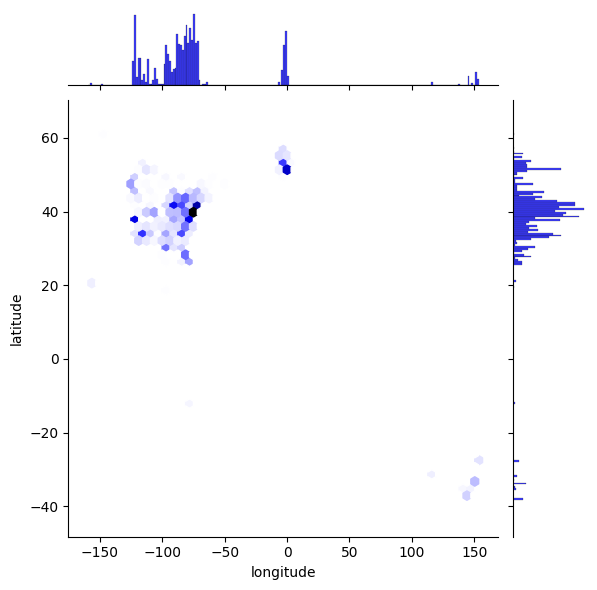

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that the latitude and longitude are of float type
df_master['latitude'] = df_master['latitude_longitude'].apply(lambda x: x[0])
df_master['longitude'] = df_master['latitude_longitude'].apply(lambda x: x[1])

# Create a hexbin plot with 'latitude' on the y-axis and 'longitude' on the x-axis
sns.jointplot(data=df_master, x='longitude', y='latitude', kind='hex', color='blue')

# Display the plot
plt.show()

In [154]:
import pandas as pd
import plotly.express as px


fig = px.scatter_geo(df_master,
                     lat='latitude',
                     lon='longitude',
                     title='Geographical Plot of Cities')

fig.update_layout(showlegend=True, geo=dict(
    landcolor='rgb(217, 217, 217)',
))

fig.show()


In [129]:
df_master["job_location"].nunique()

3075

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [151]:
df_master.to_csv('/content/drive/MyDrive/418/coordinates_processed_merged.csv', index=False)

In [156]:
dominant_jobs = df_master.groupby('latitude_longitude')['job_title'].agg(lambda x: x.value_counts().index[0])

df_master = df_master.merge(dominant_jobs.rename('dominant_job'), left_on='latitude_longitude', right_index=True)
fig = px.scatter_mapbox(df_master,
                        lat="latitude",
                        lon="longitude",
                        hover_name="dominant_job",
                        zoom=1,
                        height=600,
                        mapbox_style="carto-positron")

fig.show()

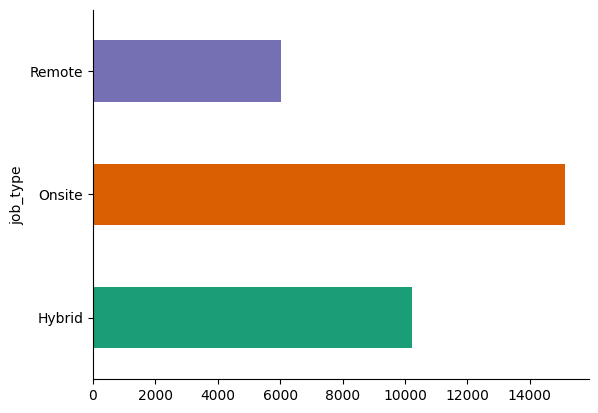

In [ ]:
# @title job_type

from matplotlib import pyplot as plt
import seaborn as sns
df_master.groupby('job_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

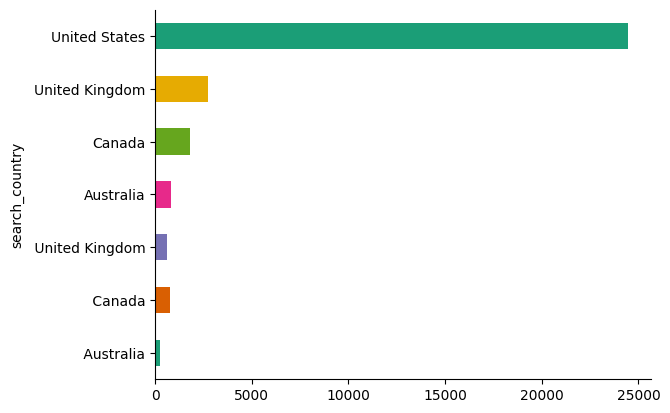

In [ ]:
# @title search_country

from matplotlib import pyplot as plt
import seaborn as sns
df_master.groupby('search_country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31368 entries, 1 to 32639
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_title       31368 non-null  object
 1   company         31368 non-null  object
 2   job_location    31368 non-null  object
 3   job_link        31368 non-null  object
 4   first_seen      31368 non-null  object
 5   search_city     31368 non-null  object
 6   search_country  31368 non-null  object
 7   job level       31368 non-null  object
 8   job_type        31368 non-null  object
 9   job_summary     31368 non-null  object
 10  job_skills      31368 non-null  object
dtypes: object(11)
memory usage: 2.9+ MB


In [ ]:
df_master['job_title'].value_counts().head(50)
# It can be seen that there are repetitions present like Senior Software Engineer and Sr. Software Engineer
# Also Senior Data Analyst vs Sr. Data Analyst.
# Such titles need to be handled and changed into a single category.

Senior Software Engineer                                                   793
Software Engineer                                                          587
Data Analyst                                                               572
Senior Data Engineer                                                       531
Data Engineer                                                              472
Business Analyst                                                           435
Data Scientist                                                             358
Senior Data Analyst                                                        348
Senior Financial Analyst                                                   274
Senior Data Scientist                                                      250
Senior Staff AI Data Engineer                                              235
Business Systems Analyst                                                   199
Software Developer                                  

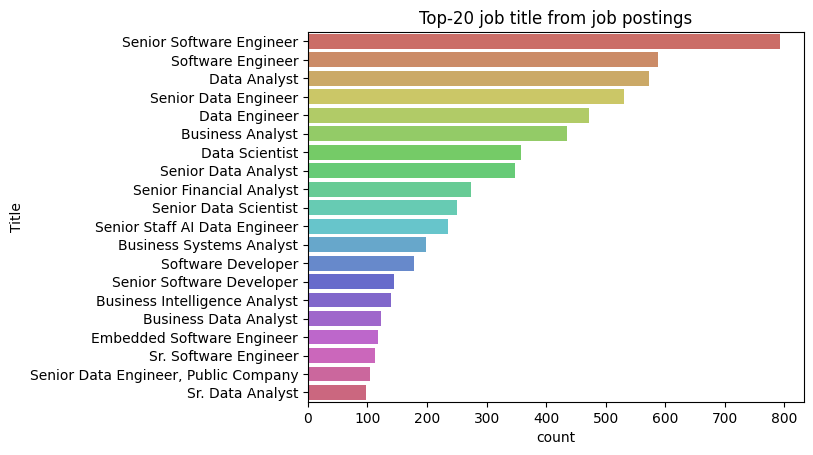

In [ ]:
job_title = df_master["job_title"].value_counts().reset_index()[:20]
job_title.columns = ["Title", "count"]

sns.barplot(x="count", y="Title", data=job_title, color="blue", palette="hls").set(title="Top-20 job title from job postings");

In [ ]:
job_counts = df_master['job_title'].value_counts().reset_index()
job_counts.columns = ['job_title', 'count']

jobs_with_count_one = job_counts[job_counts['count'] == 1]

print(jobs_with_count_one['job_title'])

3251                  Lead Cybersecurity software engineer
3252           Senior Software Engineer - Data Engineering
3253                             Software Engineer - Cloud
3254                             Software Developer (.Net)
3255     Sr. Site Reliability Engineer (Application Sof...
                               ...                        
13150     Senior Business Systems Analyst, Finance Systems
13151                                   Senior FMV Analyst
13152              BCBA - Board Certified Behavior Analyst
13153                              Treasury Analyst Senior
13154    Installation Supervisor Data Cables / Internat...
Name: job_title, Length: 9904, dtype: object


In [ ]:
job_title_counts = df_master['job_title'].value_counts()
job_title_counts_df = job_title_counts.reset_index()
job_title_counts_df.columns = ['Job Title', 'Frequency']
job_title_counts_df.to_csv('./sample_data/title_value_counts.csv', index=False)


In [ ]:
df_master['job_title'].value_counts().head(50)

Senior Software Engineer                                                   793
Software Engineer                                                          587
Data Analyst                                                               572
Senior Data Engineer                                                       531
Data Engineer                                                              472
Business Analyst                                                           435
Data Scientist                                                             358
Senior Data Analyst                                                        348
Senior Financial Analyst                                                   274
Senior Data Scientist                                                      250
Senior Staff AI Data Engineer                                              235
Business Systems Analyst                                                   199
Software Developer                                  

In [ ]:
import pandas as pd
import re

# Assuming df_master is already loaded with your data
# Function to normalize job titles
def normalize_title(title):
    title = title.lower()
    title = title.replace('sr.', 'senior').replace('sr', 'senior')
    title = title.replace('jr.', 'junior').replace('jr', 'junior')
    title = re.sub(r'[^a-z0-9 ]', '', title)
    title = ' '.join(title.split())
    return title

# Apply the normalization function to the job_title column
df_master['job_title'] = df_master['job_title'].apply(normalize_title)

# Now df_master has the 'job_title' column normalized
df_master.to_csv('normalized_dataset.csv', index=False)


In [ ]:
df_master.head(50)

In [ ]:
import pandas as pd

file_path = 'normalized_dataset.csv'
data = pd.read_csv(file_path, encoding='utf-8')

def clean_text(text):
    # Replace the 'â€™' sequence with an apostrophe
    text = text.replace('â€™', "'")
    # Remove other unwanted characters
    for char in ['*', 'â', '€', '™']:
        text = text.replace(char, '')
    return text

# Apply the cleaning function to the 'job_summary' and 'job_skills' columns
data['job_summary'] = data['job_summary'].apply(clean_text)
data['job_skills'] = data['job_skills'].apply(clean_text)

# Save the cleaned dataset to a new CSV file
data.to_csv('cleaned_dataset.csv', index=False)


In [ ]:
data.head(50)